In [1]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [3]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

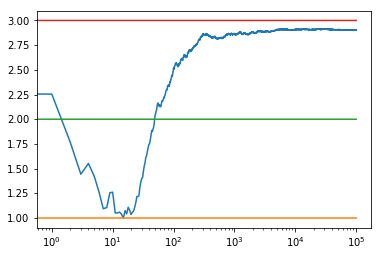

1.0087076452680601
1.966403711518251
3.003196602996998


In [4]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

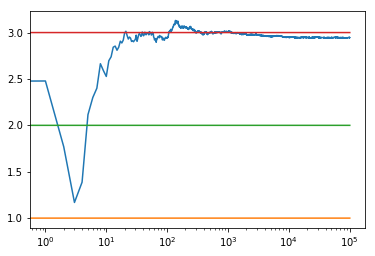

0.9882594114066127
1.983192121730736
2.9969208234921174


In [5]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

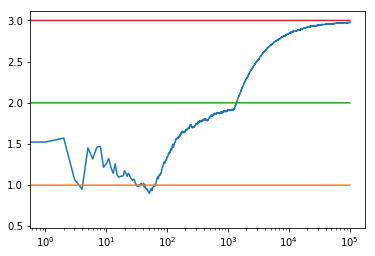

0.9636798887373925
1.9859868872707833
2.9989854876069293


In [6]:
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

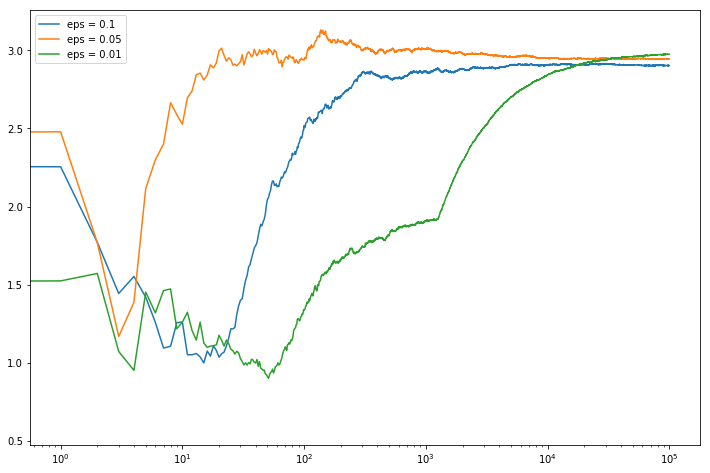

In [8]:
# log scale plot
plt.figure(figsize=(12,8))
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

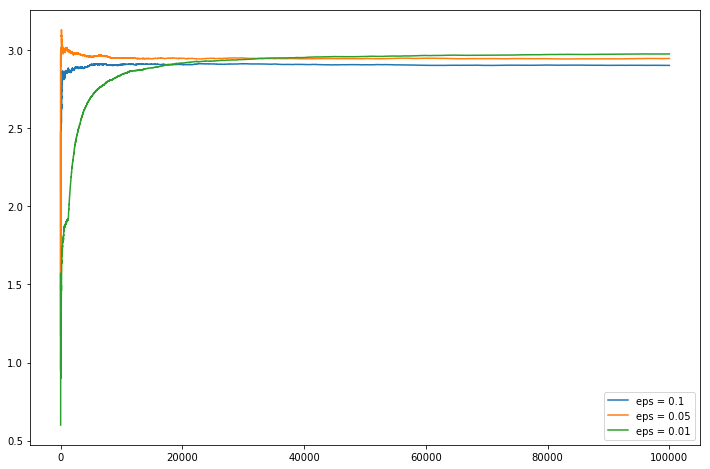

In [9]:
# linear plot
plt.figure(figsize=(12,8))
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()

In [40]:
np.random.randn() 

0.31688454372629854